# Checking Some Insight ABout Covid19 in the World!

> Are Country combacting covid19....

- author: "Stephen Kamau & Victor Omondi"
- toc: true
- comments: true
- categores: true
- image: images/logo.png

## Covid19 Is spreading Widely across alover the world.
 - Will Try to do some data analysis to help us undestand how it is spreading.
 - I will be using three dataset provided by the Jonh Hopkings University.
 - The data Is found from https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases.
 - I'm Not accurate , I'm A learner.. Stand to learn More.
 - The Dataset Is Takend from 22 January as per the data provided.

## This Is Done by ...
 - -- *Stephen Kamau*
 - --*email -- stiveckamash@gmail.com or stephenkamau714@gmail.com*

In [1]:
#import libs for processing>
import pandas as pd
import numpy as np 
import pandas_profiling as pp
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns',50)
sns.set(style = 'darkgrid')

 - I downloaded the Dataset and renamed as shown below

In [2]:
#read the data
cases = pd.read_csv("cases.csv")
deaths = pd.read_csv('deaths.csv')
recover = pd.read_csv("recovered.csv")

## Review some sample of the Data

In [3]:
#review the sample data for the cases
cases.head()

Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   
3            NaN        Andorra  42.5063   1.5218        0        0        0   
4            NaN         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  1/30/20  1/31/20  2/1/20  \
0        0        0        0        0        0        0        0       0   
1        0        0        0        0        0        0        0       0   
2        0        0        0        0        0        0        0       0   
3        0        0        0        0        0        0        0       0   
4        0        0        0        0        0        0        0       0   

   2/2/20  2/3/20  2/4/20  2/5/20  2/6/20  2/7/20  2/8/20  2/9/20  2/10/20  \
0       0       0       0       0       0       0       0       0        0   
1       0       0       0       0       0       0       0       0        0   
2       0       0       0       0       0       0       0       0        0   
3       0       0       0       0       0       0       0       0        0   
4       0       0       0       0       0       0       0       0        0   

   2/11/20  ...  6/11/20  6/12/20  6/13/20  6/14/20  6/15/20  6/16/20  \
0        0  ...    22890    23546    24102    24766    25527    26310   
1        0  ...     1385     1416     1464     1521     1590     1672   
2        0  ...    10589    10698    10810    10919    11031    11147   
3        0  ...      852      853      853      853      853      854   
4        0  ...      118      130      138      140      142      148   

   6/17/20  6/18/20  6/19/20  6/20/20  6/21/20  6/22/20  6/23/20  6/24/20  \
0    26874    27532    27878    28424    28833    29157    29481    29640   
1     1722     1788     1838     1891     1962     1995     2047     2114   
2    11268    11385    11504    11631    11771    11920    12076    12248   
3      854      855      855      855      855      855      855      855   
4      155      166      172      176      183      186      189      197   

   6/25/20  6/26/20  6/27/20  6/28/20  6/29/20  6/30/20  7/1/20  7/2/20  \
0    30175    30451    30616    30967    31238    31517   31836   32022   
1     2192     2269     2330     2402     2466     2535    2580    2662   
2    12445    12685    12968    13273    13571    13907   14272   14657   
3      855      855      855      855      855      855     855     855   
4      212      212      259      267      276      284     291     315   

   7/3/20  7/4/20  7/5/20  
0   32324   32672   32951  
1    2752    2819    2893  
2   15070   15500   15941  
3     855     855     855  
4     328     346     346  

[5 rows x 170 columns]

In [4]:
#review for deaths
deaths.head()

Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   
3            NaN        Andorra  42.5063   1.5218        0        0        0   
4            NaN         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  1/30/20  1/31/20  2/1/20  \
0        0        0        0        0        0        0        0       0   
1        0        0        0        0        0        0        0       0   
2        0        0        0        0        0        0        0       0   
3        0        0        0        0        0        0        0       0   
4        0        0        0        0        0        0        0       0   

   2/2/20  2/3/20  2/4/20  2/5/20  2/6/20  2/7/20  2/8/20  2/9/20  2/10/20  \
0       0       0       0       0       0       0       0       0        0   
1       0       0       0       0       0       0       0       0        0   
2       0       0       0       0       0       0       0       0        0   
3       0       0       0       0       0       0       0       0        0   
4       0       0       0       0       0       0       0       0        0   

   2/11/20  ...  6/11/20  6/12/20  6/13/20  6/14/20  6/15/20  6/16/20  \
0        0  ...      426      446      451      471      478      491   
1        0  ...       35       36       36       36       36       37   
2        0  ...      741      751      760      767      777      788   
3        0  ...       51       51       51       51       51       52   
4        0  ...        5        5        6        6        6        6   

   6/17/20  6/18/20  6/19/20  6/20/20  6/21/20  6/22/20  6/23/20  6/24/20  \
0      504      546      548      569      581      598      618      639   
1       38       39       42       43       44       44       45       47   
2      799      811      825      837      845      852      861      869   
3       52       52       52       52       52       52       52       52   
4        7        8        8        9        9       10       10       10   

   6/25/20  6/26/20  6/27/20  6/28/20  6/29/20  6/30/20  7/1/20  7/2/20  \
0      675      683      703      721      733      746     774     807   
1       49       51       53       55       58       62      65      69   
2      878      885      892      897      905      912     920     928   
3       52       52       52       52       52       52      52      52   
4       10       10       10       11       11       13      15      17   

   7/3/20  7/4/20  7/5/20  
0     819     826     864  
1      72      74      76  
2     937     946     952  
3      52      52      52  
4      18      19      19  

[5 rows x 170 columns]

In [5]:
#review for recovery
recover.head()

Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   
3            NaN        Andorra  42.5063   1.5218        0        0        0   
4            NaN         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  1/30/20  1/31/20  2/1/20  \
0        0        0        0        0        0        0        0       0   
1        0        0        0        0        0        0        0       0   
2        0        0        0        0        0        0        0       0   
3        0        0        0        0        0        0        0       0   
4        0        0        0        0        0        0        0       0   

   2/2/20  2/3/20  2/4/20  2/5/20  2/6/20  2/7/20  2/8/20  2/9/20  2/10/20  \
0       0       0       0       0       0       0       0       0        0   
1       0       0       0       0       0       0       0       0        0   
2       0       0       0       0       0       0       0       0        0   
3       0       0       0       0       0       0       0       0        0   
4       0       0       0       0       0       0       0       0        0   

   2/11/20  ...  6/11/20  6/12/20  6/13/20  6/14/20  6/15/20  6/16/20  \
0        0  ...     3326     3928     4201     4725     5164     5508   
1        0  ...     1001     1034     1039     1044     1055     1064   
2        0  ...     7255     7322     7420     7606     7735     7842   
3        0  ...      780      781      781      781      789      789   
4        0  ...       41       42       61       61       64       64   

   6/17/20  6/18/20  6/19/20  6/20/20  6/21/20  6/22/20  6/23/20  6/24/20  \
0     6158     7660     7962     8292     8764     8841     9260     9869   
1     1077     1086     1114     1126     1134     1159     1195     1217   
2     7943     8078     8196     8324     8422     8559     8674     8792   
3      791      792      792      792      792      796      797      797   
4       64       64       66       66       77       77       77       77   

   6/25/20  6/26/20  6/27/20  6/28/20  6/29/20  6/30/20  7/1/20  7/2/20  \
0    10174    10306    10674    12604    13934    14131   15651   16041   
1     1250     1298     1346     1384     1438     1459    1516    1559   
2     8920     9066     9202     9371     9674     9897   10040   10342   
3      797      799      799      799      799      799     799     800   
4       81       81       81       81       93       93      97      97   

   7/3/20  7/4/20  7/5/20  
0   17331   19164   19366  
1    1592    1637    1657  
2   10832   11181   11492  
3     800     800     800  
4     107     108     108  

[5 rows x 170 columns]

In [6]:
#checking nulls in the province /state columns
print("cases nan " , cases.iloc[: , 0].isna().sum())
print('recovery nan ', recover.iloc[: , 0].isna().sum())
print('deaths nan ', deaths.iloc[: , 0].isna().sum())

cases nan  185
recovery nan  186
deaths nan  185


### Here We see taha Province/State has mostly Nulls.
 - This might be because of difference in political states of countries.
 - I will drop this columns as it does not have much Impact To our Data

In [7]:
#lets drop the province/state col since it contains mostly nulls in all dfs
cases.drop('Province/State' , axis =1 , inplace = True)
recover.drop('Province/State' , axis =1 , inplace = True)
deaths.drop('Province/State' , axis =1 , inplace = True)

### Rename the  "Country/Region" into one single name in order to work with it easily

In [8]:
#renaming the country/region column withsingle word
country_rn = {"Country/Region":"Country"}
cases.rename(columns =country_rn , inplace = True)
recover.rename(columns =country_rn , inplace = True)
deaths.rename(columns =country_rn , inplace = True)

In [9]:
#check if it was applied
cases.head()

Country      Lat     Long  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  \
0  Afghanistan  33.0000  65.0000        0        0        0        0        0   
1      Albania  41.1533  20.1683        0        0        0        0        0   
2      Algeria  28.0339   1.6596        0        0        0        0        0   
3      Andorra  42.5063   1.5218        0        0        0        0        0   
4       Angola -11.2027  17.8739        0        0        0        0        0   

   1/27/20  1/28/20  1/29/20  1/30/20  1/31/20  2/1/20  2/2/20  2/3/20  \
0        0        0        0        0        0       0       0       0   
1        0        0        0        0        0       0       0       0   
2        0        0        0        0        0       0       0       0   
3        0        0        0        0        0       0       0       0   
4        0        0        0        0        0       0       0       0   

   2/4/20  2/5/20  2/6/20  2/7/20  2/8/20  2/9/20  2/10/20  2/11/20  2/12/20  \
0       0       0       0       0       0       0        0        0        0   
1       0       0       0       0       0       0        0        0        0   
2       0       0       0       0       0       0        0        0        0   
3       0       0       0       0       0       0        0        0        0   
4       0       0       0       0       0       0        0        0        0   

   ...  6/11/20  6/12/20  6/13/20  6/14/20  6/15/20  6/16/20  6/17/20  \
0  ...    22890    23546    24102    24766    25527    26310    26874   
1  ...     1385     1416     1464     1521     1590     1672     1722   
2  ...    10589    10698    10810    10919    11031    11147    11268   
3  ...      852      853      853      853      853      854      854   
4  ...      118      130      138      140      142      148      155   

   6/18/20  6/19/20  6/20/20  6/21/20  6/22/20  6/23/20  6/24/20  6/25/20  \
0    27532    27878    28424    28833    29157    29481    29640    30175   
1     1788     1838     1891     1962     1995     2047     2114     2192   
2    11385    11504    11631    11771    11920    12076    12248    12445   
3      855      855      855      855      855      855      855      855   
4      166      172      176      183      186      189      197      212   

   6/26/20  6/27/20  6/28/20  6/29/20  6/30/20  7/1/20  7/2/20  7/3/20  \
0    30451    30616    30967    31238    31517   31836   32022   32324   
1     2269     2330     2402     2466     2535    2580    2662    2752   
2    12685    12968    13273    13571    13907   14272   14657   15070   
3      855      855      855      855      855     855     855     855   
4      212      259      267      276      284     291     315     328   

   7/4/20  7/5/20  
0   32672   32951  
1    2819    2893  
2   15500   15941  
3     855     855  
4     346     346  

[5 rows x 169 columns]

In [10]:
#checking the total number of countries with the virus cases
#total number of counties
print(f"Total number of countries with cases are  {cases['Country'].nunique()}")
print(f"Total number of countries with recovers are  {recover['Country'].nunique()}")
print(f"Total number of countries with deaths are  {deaths['Country'].nunique()}")

Total number of countries with cases are  188
Total number of countries with recovers are  188
Total number of countries with deaths are  188


## We see that the data provided has *188* unique countries

### I wanna Change The data Format
 - AS shown from the datsets provided .
             - The dataset has long format 
             - The dates are columns for data.
 - I wanna change the dates into indexes of our data.
 - We will Have *Cases* , *recover* , *deathsx* , *Date* , *country* as our columns
 - Lets Do it Now 

In [11]:
# cases.groupby('Country').sum()
#droping "long " as its is in the list of dates
dates = cases.columns[2:].drop('Long')

In [12]:
# This will be our column data
dates

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '6/26/20', '6/27/20', '6/28/20', '6/29/20', '6/30/20', '7/1/20',
       '7/2/20', '7/3/20', '7/4/20', '7/5/20'],
      dtype='object', length=166)

## Will Start By Grouping the Data Using the Country Column and get the Dates columns

In [13]:
country_cases = cases.groupby('Country').sum()[dates]
country_recover = recover.groupby('Country').sum()[dates]
country_deaths = deaths.groupby('Country').sum()[dates]
# country_cases.stack()

## Gonna create a dataframe with this data.
 - Country+data will be our index
 - then i will stack the above group data to short format

In [14]:
# Creating the dataframe with country , cases , deaths and recoverys
df = pd.DataFrame({
    'Country/Date':list(country_cases.stack().index),
    'cases':country_cases.stack() ,
    'deaths':country_deaths.stack(),
    'recovered':country_recover.stack()
}).reset_index(drop=True)

In [15]:
#review our new dataframe
df.head(10)

Country/Date  cases  deaths  recovered
0  (Afghanistan, 1/22/20)      0       0          0
1  (Afghanistan, 1/23/20)      0       0          0
2  (Afghanistan, 1/24/20)      0       0          0
3  (Afghanistan, 1/25/20)      0       0          0
4  (Afghanistan, 1/26/20)      0       0          0
5  (Afghanistan, 1/27/20)      0       0          0
6  (Afghanistan, 1/28/20)      0       0          0
7  (Afghanistan, 1/29/20)      0       0          0
8  (Afghanistan, 1/30/20)      0       0          0
9  (Afghanistan, 1/31/20)      0       0          0

In [16]:
# deaths.groupby(['Country' , 'Lat' , 'Long']).sum()[dt].stack()
# country_cases.stack()

## Spliting the Index Columns(country/date) into Date and Country columns separetely
 -

In [17]:
#the data is now well presented
# lets do some analysis
df['Country/Date'].str.get(0)

0        Afghanistan
1        Afghanistan
2        Afghanistan
3        Afghanistan
4        Afghanistan
            ...     
31203       Zimbabwe
31204       Zimbabwe
31205       Zimbabwe
31206       Zimbabwe
31207       Zimbabwe
Name: Country/Date, Length: 31208, dtype: object

In [18]:
# Add Separatecountry and Date columns
# df['country'] = df['Country/Date'].apply(lambda x: x.split()[0])
# df['Date'] = df['Country/Date'].apply(lambda x: x.split()[1])
df['country'] = df['Country/Date'].str.get(0)
df['Date'] = df['Country/Date'].str.get(1)
#drop the couttry.date column
df.drop('Country/Date' , axis =1 , inplace = True)

In [19]:
df.head()

cases  deaths  recovered      country     Date
0      0       0          0  Afghanistan  1/22/20
1      0       0          0  Afghanistan  1/23/20
2      0       0          0  Afghanistan  1/24/20
3      0       0          0  Afghanistan  1/25/20
4      0       0          0  Afghanistan  1/26/20

##  We now Have A time series Data that can be used for Further Aanalysis

In [20]:
#import advanced plotting module
import plotly.express as px
import plotly.graph_objects as go

## Let Get the sum of each day.
 - We goona group by date and then get the needed columns

In [21]:
#lets group by the date
df1 = df.groupby('Date').sum()[["cases" , 'deaths' , 'recovered']].reset_index()
df1.head()

Date  cases  deaths  recovered
0  1/22/20    555      17         28
1  1/23/20    654      18         30
2  1/24/20    941      26         36
3  1/25/20   1434      42         39
4  1/26/20   2118      56         52

In [22]:
df2 = df1.copy()
#checking weekly cases
df2.dtypes

Date         object
cases         int64
deaths        int64
recovered     int64
dtype: object

In [23]:
#chenge the date columns to datetime datatype
df2['Date'] = pd.to_datetime(df2['Date'])
df1['Date'] = pd.to_datetime(df1['Date'])

In [24]:
df2.dtypes

Date         datetime64[ns]
cases                 int64
deaths                int64
recovered             int64
dtype: object

## Lets Try Getting Data in Weekly and Monthly Bases To be Used for analysis

In [25]:
#get weekly columns
df2['week'] = df2['Date'].dt.week

In [26]:
#get Montly column
df2['month'] = df2['Date'].dt.month

## Checking Plots for  total Weekly and total Montly data

In [27]:
#get sum for each week
weekly_df = df2.groupby('week').sum()[["cases" , 'deaths' , 'recovered']].reset_index()

In [28]:
#get sum for each month
monthly_df = df2.groupby('month').sum()[["cases" , 'deaths' , 'recovered']].reset_index()

## Plot Motlhly Data

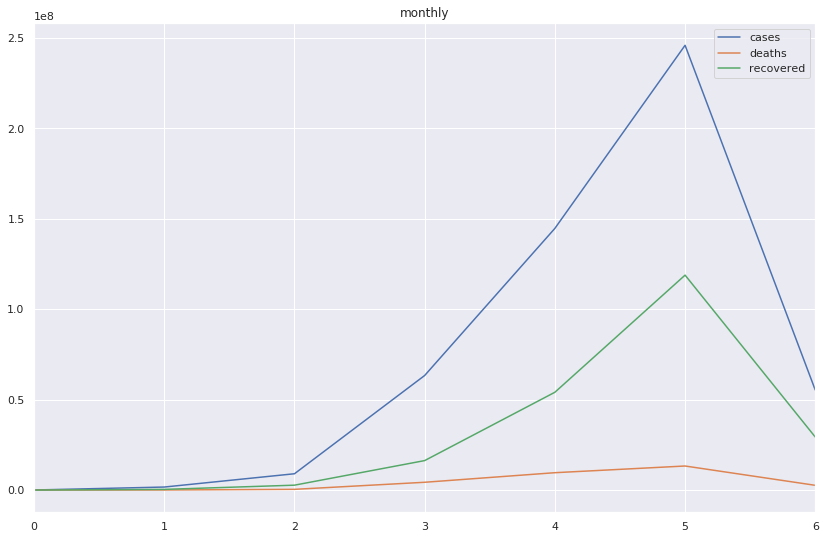

In [29]:
# fig= plt.Figure(figsize = (10,15))
monthly_df[['cases' , 'deaths' , 'recovered']].plot(title = "monthly" ,figsize=(14 , 9))

# Observations from Monthly Plot
 - TToatal Cases and recovered Had exponential curve which teached maximum on june.
 - Cuerve for cases of a bit Steep.
 - Deaths Has an almost flat curve.
## From the Above the Cases and recovery has similar shape although cases are much higher than recovery.
## There is queite almost same ration for cases and recovered.
 - Deaths have low values this maybe due to the Fact That the states are taking measures to flatten it.
 
## From The Above... It seems that the curves are steeply reducing
 -This may be an indicates that from june to now september there is a slow record of Numbers.
 
 
## Does this means of Flattening the curves????
 -- Actually NOpe... 
 -- This beccause we have less data for the month of july(6th month) thus showing an instant drop.
 
 
### Lets try Using weekly records as it will overcome the above effects slightly
 
 

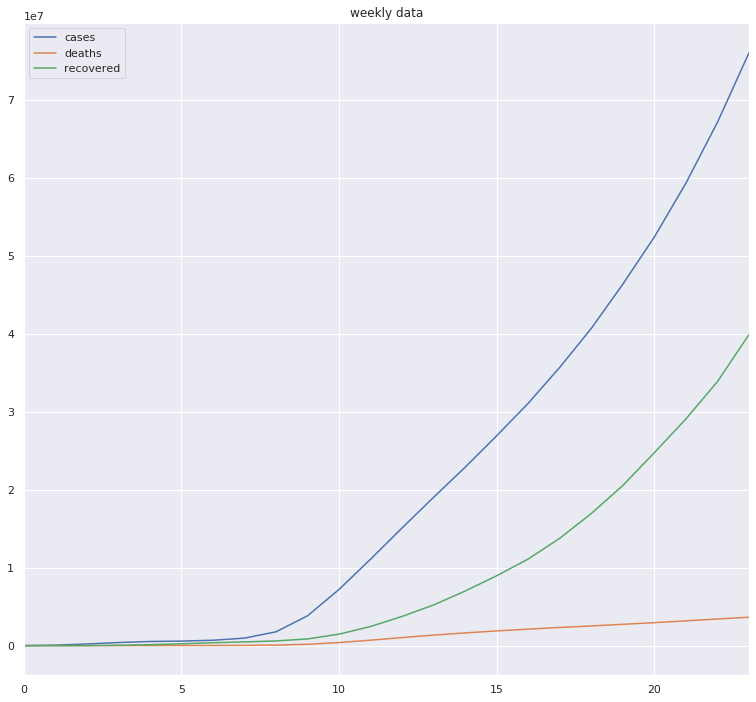

In [30]:
weekly_df[['cases' , 'deaths' , 'recovered']].plot(title = "weekly data" , figsize = (13,12)  )

# Observation...
 - The cases and recovery cases has an exponential curve.
 - All the curves has a sharp increase from week 10....thats around *April* Actually where most country had a records
 - There is no decrease or curves moving downs as shown by mothly data.
 
 
 
## Lets Use Log Transformation to see if there is channges

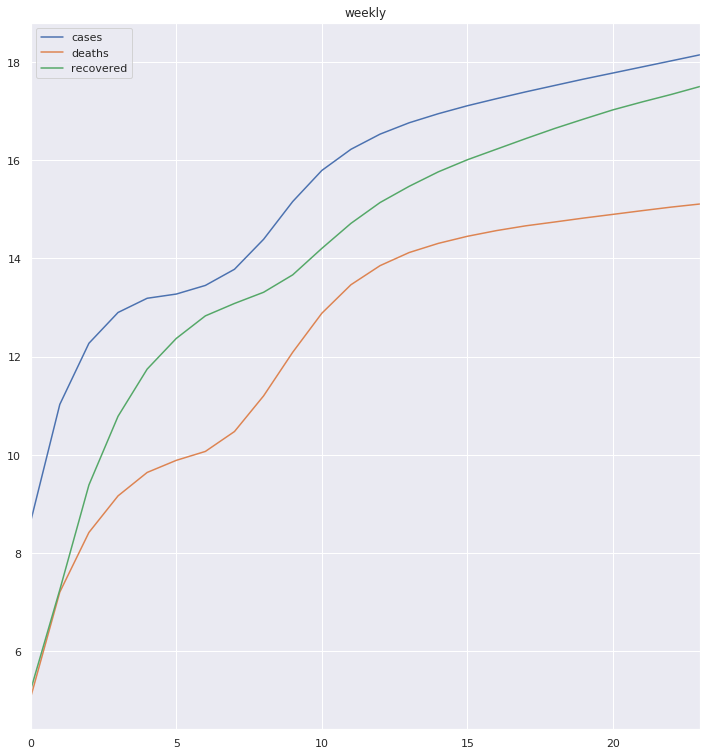

In [31]:
#checking for data with log transformation
np.log(weekly_df[['cases' , 'deaths' , 'recovered']]).plot(title = "weekly" ,figsize=(12,13))

## The Data has same Impression has weekly Data curve above 

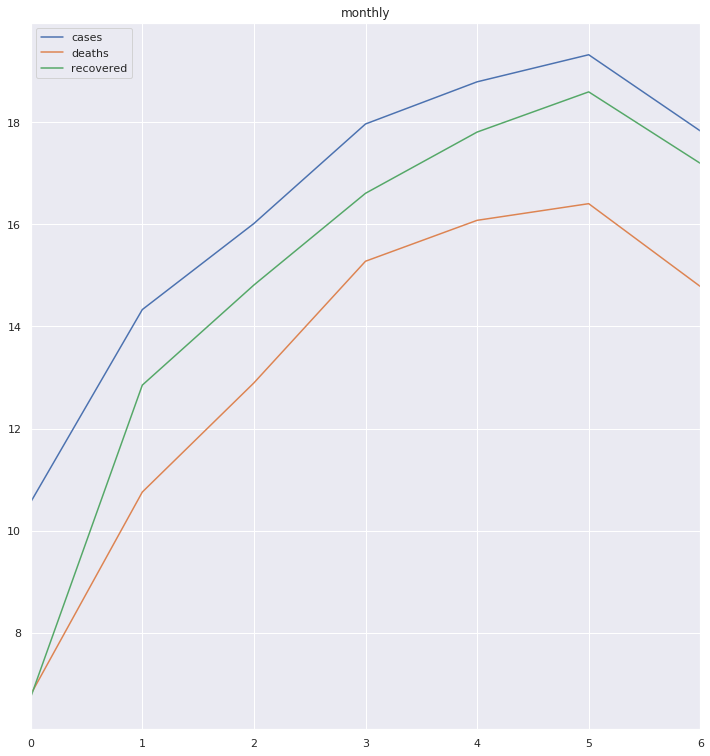

In [32]:
#logs transformation for mothnly data
np.log(monthly_df[['cases' , 'deaths' , 'recovered']]).plot(title = "monthly" ,figsize=(12,13))

## Its also almost similar to above with sharp change in july

## Gonna Use Barplots to see The impressions

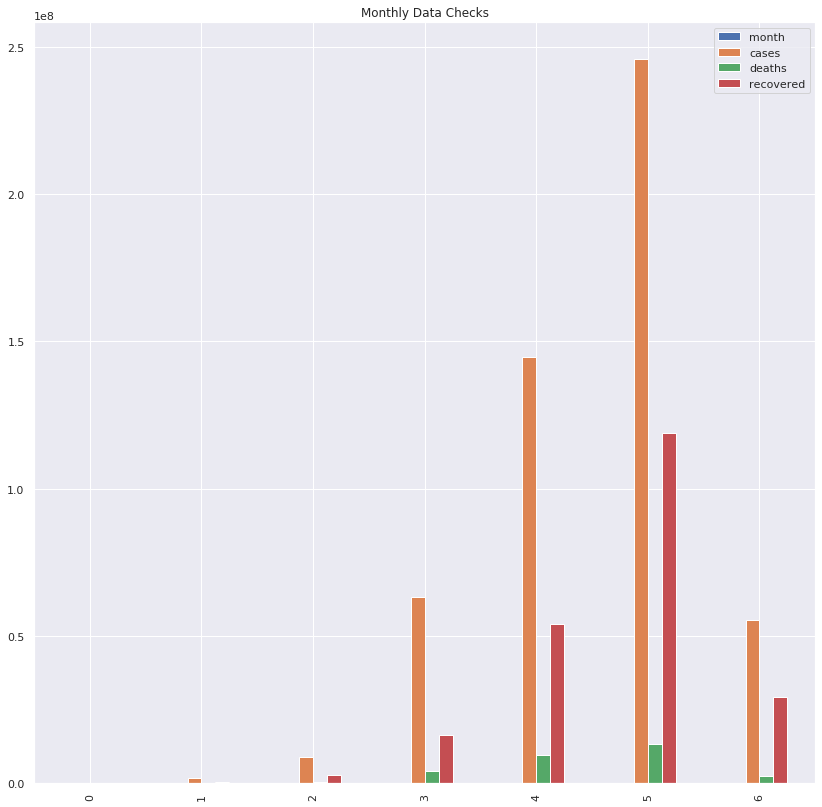

In [33]:
#try barplot for monthly and weekly
monthly_df.plot(kind = 'bar' , figsize =(14 , 14) , title ="Monthly Data Checks")

#  Observations...
 ## I will discard the 6th month(july) because we have less data about it
 
 
 - It seemms to have a * sharp rise* each months.
 - Cases confirmed is always Higher each month followed by recovery then deaths.

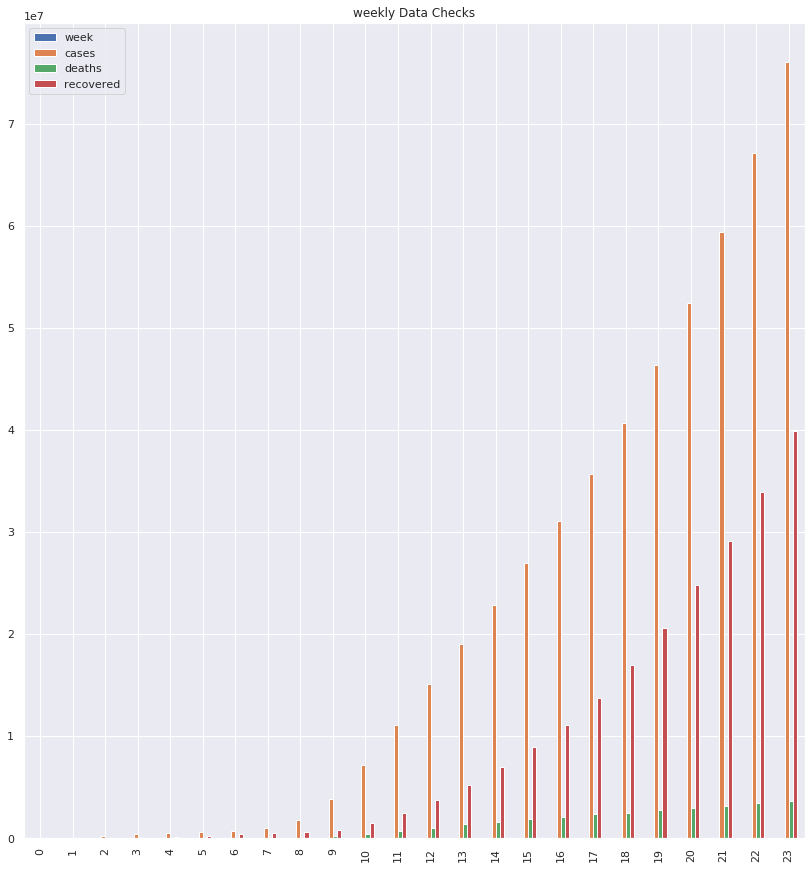

In [34]:
#barplot for weekly data
weekly_df.plot(kind = 'bar' , figsize =(14 , 15) , title ="weekly Data Checks")

# Observations ----
 ## This Plot actually shows the best Impression on the covid19 rise
 
 - The plots seems to rise each Weeks thus there is an increase in recordes for each weeks.
 -  The plots seems to draw a quite sharp exponential curve

## Checking on World Distribution od the records

In [35]:
# A function to draw line plot using plotly.
# plotly is an advancesd library for data visualization
def draw_lines(data , country):
    fig = go.Figure()
#     country = 'World'
    fig.add_trace(go.Scatter(x =data['Date'] , y = data['cases'] , name = "Cases") )
    fig.add_trace(go.Scatter(x =data['Date'] , y = data['recovered'] , name = "Recoverde" ))
    fig.add_trace(go.Scatter(x =data['Date'] , y = data['deaths'] , name = "Deaths"))
    fig.update_layout(title = f"Comparison btween {country} Cases , Deathes and recovered" , xaxis_title = "Dates" , yaxis_title= "Total Numbers")
    fig.show()

# Lets Draw the curves for all world data

In [36]:
# dately_df = df1.copy()
draw_lines(df.groupby('Date').sum()[["cases" , 'deaths' , 'recovered']].reset_index() , 'World')

# Observation
  - There is sharp in data ..
  - This was shaown above by the data for weekly and monthly.
  - A quite unfarmilier this is that.
           - We have Sunken and rises areas on the curve.

- I'm not quite sure of this.

In [37]:
cases.tail()

Country        Lat       Long  1/22/20  1/23/20  1/24/20  \
261  Sao Tome and Principe   0.186360   6.613081        0        0        0   
262                  Yemen  15.552727  48.516388        0        0        0   
263                Comoros -11.645500  43.333300        0        0        0   
264             Tajikistan  38.861034  71.276093        0        0        0   
265                Lesotho -29.609988  28.233608        0        0        0   

     1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  1/30/20  1/31/20  2/1/20  \
261        0        0        0        0        0        0        0       0   
262        0        0        0        0        0        0        0       0   
263        0        0        0        0        0        0        0       0   
264        0        0        0        0        0        0        0       0   
265        0        0        0        0        0        0        0       0   

     2/2/20  2/3/20  2/4/20  2/5/20  2/6/20  2/7/20  2/8/20  2/9/20  2/10/20  \
261       0       0       0       0       0       0       0       0        0   
262       0       0       0       0       0       0       0       0        0   
263       0       0       0       0       0       0       0       0        0   
264       0       0       0       0       0       0       0       0        0   
265       0       0       0       0       0       0       0       0        0   

     2/11/20  2/12/20  ...  6/11/20  6/12/20  6/13/20  6/14/20  6/15/20  \
261        0        0  ...      632      639      659      661      662   
262        0        0  ...      591      632      705      728      844   
263        0        0  ...      162      163      176      176      176   
264        0        0  ...     4834     4902     4971     5035     5097   
265        0        0  ...        4        4        4        4        4   

     6/16/20  6/17/20  6/18/20  6/19/20  6/20/20  6/21/20  6/22/20  6/23/20  \
261      671      683      688      693      698      698      702      707   
262      885      902      909      919      922      941      967      992   
263      197      197      210      210      247      247      247      265   
264     5160     5221     5279     5338     5399     5457     5513     5567   
265        4        4        4        4        4        4       12       17   

     6/24/20  6/25/20  6/26/20  6/27/20  6/28/20  6/29/20  6/30/20  7/1/20  \
261      710      711      712      713      713      713      714     715   
262     1015     1076     1089     1103     1118     1128     1158    1190   
263      265      272      272      272      272      272      303     303   
264     5630     5691     5747     5799     5849     5900     5900    6005   
265       17       17       24       24       27       27       27      35   

     7/2/20  7/3/20  7/4/20  7/5/20  
261     717     719     719     720  
262    1221    1240    1248    1265  
263     303     309     309     311  
264    6058    6058    6159    6213  
265      35      35      35      79  

[5 rows x 169 columns]

# so what is the percentage off recoveries , deaths compaired to active cases.
# percentage contribution to the world
# lets check this
# %death =  deaths/totalCases*100
# %recover = recover/totalCase*100
# active  = cases - (deaths+recovered)

In [38]:

death_rate = []
recover_rate = []
active = []
cases = []
countries = df['country'].unique().tolist()
# df[df['country'] == 'US'].iloc[-1 , :]
# len(countries)
for cou in countries:
    cou_df = df[df['country'] == cou].iloc[-1 , :]
    cas = cou_df.iloc[0]
    dea = cou_df.iloc[1]
    rec = cou_df.iloc[2]
    cases.append(cas)
#     death% =  deaths/cases*100
    death_rate.append((dea/cas)*100)
    recover_rate.append((rec/cas)*100)
    active.append((cas-(dea+rec)))

In [39]:
new_df = pd.DataFrame()
new_df['country'] = countries
new_df['active'] = active
new_df['cases'] = cases
new_df['death_rate'] = death_rate
new_df['recover_rate'] = recover_rate

In [40]:
new_df.shape

(188, 5)

In [41]:
new_df.head()

country  active  cases  death_rate  recover_rate
0  Afghanistan   12721  32951    2.622075     58.772116
1      Albania    1160   2893    2.627031     57.276184
2      Algeria    3497  15941    5.972022     72.090835
3      Andorra       3    855    6.081871     93.567251
4       Angola     219    346    5.491329     31.213873

In [42]:
#check the country with highest and lowest recovery rate
low_20_recover = new_df.sort_values(by = 'recover_rate').head(20)

In [43]:
top_20_recover = new_df.sort_values(by = 'recover_rate').tail(20)

## Top 20 Countries with lowest and Highesr Recovery

In [44]:
top_20_recover

country  active  cases  death_rate  recover_rate
57                            Estonia      50   1993    3.462117     94.029102
60                               Fiji       1     19    0.000000     94.736842
175                            Uganda      48    939    0.000000     94.888179
182                           Vietnam      15    355    0.000000     95.774648
49                           Djibouti     144   4792    1.147746     95.847245
168                          Thailand      61   3190    1.818182     96.269592
112                         Mauritius       1    341    2.932551     96.774194
110                             Malta      11    672    1.339286     97.023810
123                       New Zealand      22   1534    1.434159     97.131682
165                           Taiwan*       4    449    1.559020     97.550111
101                     Liechtenstein       1     83    1.204819     97.590361
107                          Malaysia      77   8663    1.396745     97.714418
24                             Brunei       0    141    2.127660     97.872340
78                            Iceland      20   1863    0.536769     98.389694
50                           Dominica       0     18    0.000000    100.000000
169                       Timor-Leste       0     24    0.000000    100.000000
95                               Laos       0     19    0.000000    100.000000
69                            Grenada       0     23    0.000000    100.000000
75                           Holy See       0     12    0.000000    100.000000
144  Saint Vincent and the Grenadines       0     29    0.000000    100.000000

In [45]:
low_20_recover

country  active   cases  death_rate  recover_rate
104                MS Zaandam       7       9   22.222222      0.000000
162                    Sweden   65999   71419    7.589017      0.000000
122               Netherlands   44501   50834   12.090333      0.367864
178            United Kingdom  241251  286931   15.440995      0.479209
120                   Namibia     387     412    0.000000      6.067961
76                   Honduras   20814   23943    2.668838     10.399699
22                   Botswana     247     277    0.361011     10.469314
183        West Bank and Gaza    3770    4277    0.374094     11.480009
150                Seychelles      70      81    0.000000     13.580247
98                    Lesotho      68      79    0.000000     13.924051
70                  Guatemala   18919   23248    4.073469     14.547488
157               South Sudan    1650    2021    1.880257     16.476992
106                    Malawi    1279    1613    1.053937     19.652821
33   Central African Republic    3007    3969    1.209373     23.028471
74                      Haiti    4671    6333    1.784304     24.459182
100                     Libya     753    1046    3.059273     24.952199
187                  Zimbabwe     527     716    1.117318     25.279330
119                Mozambique     723     987    0.810537     25.937183
56                    Eritrea     159     215    0.000000     26.046512
135               Philippines   31015   44254    2.930809     26.985131

## Top 20 countries with more and low deaths rate

In [46]:
#which countries has more death rate
display(new_df.sort_values(by = 'death_rate').head(20))

country  active  cases  death_rate  recover_rate
50                           Dominica       0     18    0.000000    100.000000
120                           Namibia     387    412    0.000000      6.067961
56                            Eritrea     159    215    0.000000     26.046512
132                  Papua New Guinea       3     11    0.000000     72.727273
98                            Lesotho      68     79    0.000000     13.924051
19                             Bhutan      27     80    0.000000     66.250000
142             Saint Kitts and Nevis       1     16    0.000000     93.750000
143                       Saint Lucia       3     22    0.000000     86.363636
95                               Laos       0     19    0.000000    100.000000
30                           Cambodia      10    141    0.000000     92.907801
150                        Seychelles      70     81    0.000000     13.580247
144  Saint Vincent and the Grenadines       0     29    0.000000    100.000000
116                          Mongolia      32    220    0.000000     85.454545
182                           Vietnam      15    355    0.000000     95.774648
75                           Holy See       0     12    0.000000    100.000000
60                               Fiji       1     19    0.000000     94.736842
169                       Timor-Leste       0     24    0.000000    100.000000
175                            Uganda      48    939    0.000000     94.888179
69                            Grenada       0     23    0.000000    100.000000
152                         Singapore    4333  44800    0.058036     90.270089

In [47]:
#death rate with top
display(new_df.sort_values(by = 'death_rate').tail(20))

country  active   cases  death_rate  recover_rate
154        Slovenia     205    1700    6.529412     81.411765
17           Belize       9      30    6.666667     63.333333
83          Ireland     422   25527    6.820230     91.526619
14         Barbados       1      98    7.142857     91.836735
162          Sweden   65999   71419    7.589017      0.000000
52          Ecuador   28455   61958    7.716518     46.357210
32           Canada   27883  107394    8.137326     65.899398
34             Chad      11     872    8.486239     90.252294
184  Western Sahara       1      10   10.000000     80.000000
11          Bahamas       4     104   10.576923     85.576923
158           Spain   71784  250545   11.329302     60.019557
113          Mexico   26295  256848   11.928845     77.833583
122     Netherlands   44501   50834   12.090333      0.367864
77          Hungary     783    4183   14.080803     67.200574
85            Italy   14642  241611   14.428565     79.511281
62           France   97141  204222   14.638971     37.794655
178  United Kingdom  241251  286931   15.440995      0.479209
16          Belgium   35154   62016   15.755611     27.559017
104      MS Zaandam       7       9   22.222222      0.000000
185           Yemen     375    1265   26.719368     43.636364

## YEmen has higehst Death Rate

## Top Countries with Highests and lowest active cases

In [48]:
#those with lowest active cases cases
display(new_df.sort_values(by = 'active').head(20))

country  active  cases  death_rate  recover_rate
145                        San Marino       0    698    6.017192     93.982808
69                            Grenada       0     23    0.000000    100.000000
24                             Brunei       0    141    2.127660     97.872340
50                           Dominica       0     18    0.000000    100.000000
169                       Timor-Leste       0     24    0.000000    100.000000
95                               Laos       0     19    0.000000    100.000000
75                           Holy See       0     12    0.000000    100.000000
144  Saint Vincent and the Grenadines       0     29    0.000000    100.000000
184                    Western Sahara       1     10   10.000000     80.000000
60                               Fiji       1     19    0.000000     94.736842
101                     Liechtenstein       1     83    1.204819     97.590361
14                           Barbados       1     98    7.142857     91.836735
112                         Mauritius       1    341    2.932551     96.774194
142             Saint Kitts and Nevis       1     16    0.000000     93.750000
3                             Andorra       3    855    6.081871     93.567251
132                  Papua New Guinea       3     11    0.000000     72.727273
143                       Saint Lucia       3     22    0.000000     86.363636
165                           Taiwan*       4    449    1.559020     97.550111
11                            Bahamas       4    104   10.576923     85.576923
104                        MS Zaandam       7      9   22.222222      0.000000

In [49]:
#those with highest active cases cases
display(new_df.sort_values(by = 'active').tail(20))

country   active    cases  death_rate  recover_rate
80        Indonesia    31473    63749    4.974196     45.655618
89       Kazakhstan    32526    48574    0.387038     32.651213
16          Belgium    35154    62016   15.755611     27.559017
122     Netherlands    44501    50834   12.090333      0.367864
6         Argentina    48711    77815    1.936645     35.464885
53            Egypt    51184    75253    4.442348     27.541759
147    Saudi Arabia    62357   209509    0.914519     69.322082
37         Colombia    62864   113685    3.675067     41.028280
162          Sweden    65999    71419    7.589017      0.000000
158           Spain    71784   250545   11.329302     60.019557
13       Bangladesh    87740   162417    1.263415     44.715147
130        Pakistan    95407   231818    2.054198     56.789809
62           France    97141   204222   14.638971     37.794655
134            Peru    98172   302718    3.497975     64.071842
156    South Africa   100236   196750    1.625921     47.428208
140          Russia   220143   680283    1.491291     66.148206
178  United Kingdom   241251   286931   15.440995      0.479209
79            India   253287   697413    2.823721     60.858200
23           Brazil   509143  1603055    4.046461     64.192744
174              US  1851925  2888635    4.498561     31.390709

### US , Brazil and India Tops the list with highest active cases

# Lets Use Malaysia , India and Kenya To check on various trends
  - I picked malaysia as it has highest recovery with more confimed cases.
  - I picked India as it has Has the 3rd Most with active Cases
  - I'm Compairing With Kenya... My Country 

##  Checking on Kenya Data Analys

In [50]:
kenya_df =df[df['country'] == 'Kenya']
india_df = df[df['country'] =='India']
malasia_df = df[df['country']=="Malaysia"]

In [51]:
#view kenyan one
kenya_df.head()

cases  deaths  recovered country     Date
14940      0       0          0   Kenya  1/22/20
14941      0       0          0   Kenya  1/23/20
14942      0       0          0   Kenya  1/24/20
14943      0       0          0   Kenya  1/25/20
14944      0       0          0   Kenya  1/26/20

In [52]:
kenya_df.shape

(166, 5)

In [53]:
#view malasia one
malasia_df.head()

cases  deaths  recovered   country     Date
17762      0       0          0  Malaysia  1/22/20
17763      0       0          0  Malaysia  1/23/20
17764      0       0          0  Malaysia  1/24/20
17765      3       0          0  Malaysia  1/25/20
17766      4       0          0  Malaysia  1/26/20

In [54]:
malasia_df.shape

(166, 5)

In [55]:
#india view
india_df.head()

cases  deaths  recovered country     Date
13114      0       0          0   India  1/22/20
13115      0       0          0   India  1/23/20
13116      0       0          0   India  1/24/20
13117      0       0          0   India  1/25/20
13118      0       0          0   India  1/26/20

In [56]:
india_df.shape

(166, 5)

In [57]:
#total cases, deaths , adn recovered as per date#
#since this is a time series data
#the data increases daily thus cases for today are total previos plus today..
#to get the sum od the values we will use the last row


#4Kenya
print(f"Total Confirmed Cases Are {kenya_df['cases'].iloc[-1]} Peoples")
print(f"Total Recovered are {kenya_df['recovered'].iloc[-1]} People")
print(f"Total Deathes are {kenya_df['deaths'].iloc[-1]} Peoples")

Total Confirmed Cases Are 7886 Peoples
Total Recovered are 2287 People
Total Deathes are 160 Peoples


In [58]:
#4India
print(f"Total Confirmed Cases Are {india_df['cases'].iloc[-1]} Peoples")
print(f"Total Recovered are {india_df['recovered'].iloc[-1]} People")
print(f"Total Deathes are {india_df['deaths'].iloc[-1]} Peoples")

Total Confirmed Cases Are 697413 Peoples
Total Recovered are 424433 People
Total Deathes are 19693 Peoples


In [59]:
#4malaysia
print(f"Total Confirmed Cases Are {malasia_df['cases'].iloc[-1]} Peoples")
print(f"Total Recovered are {malasia_df['recovered'].iloc[-1]} People")
print(f"Total Deathes are {malasia_df['deaths'].iloc[-1]} Peoples")

Total Confirmed Cases Are 8663 Peoples
Total Recovered are 8465 People
Total Deathes are 121 Peoples


In [60]:
#draw for kenya data
draw_lines(kenya_df , "Kenya")

## #observations
 - Deaths have almost flattened curve
 - recovered has a curve increasing
 - cases has exponential curve

In [61]:
#draw for india data
draw_lines(india_df , "India")

## #observations
 - Deaths have almost flattened curve
 - recovered has a curve increasing
 - cases has exponential curve
    
    
    ## Same as for Kenya

In [62]:
#draw for india data
draw_lines(malasia_df , "Malaysia")

## #observations
 - Deaths have a flattened curve
 - recovered and cases has curves thats has started flattening
 - The curves are not sharp
    
    
    ##Very different curve from Kenya one.
    ## Their Curve started flattening from mid april

In [63]:
#check total active cases
# active cases = cases - (deaths+recovered)
total_active_ke = kenya_df['cases']-(kenya_df['recovered']+kenya_df['deaths'])
total_active_mal = malasia_df['cases']-(malasia_df['recovered']+malasia_df['deaths'])
total_active_in = india_df['cases']-(india_df['recovered']+india_df['deaths'])
#ssince the data is in series we are going to use the last row
print(f"Total Active cases in Kenya are {total_active_ke.iloc[-1]} peoples")
print(f"Total Active cases in Malaysia are {total_active_mal.iloc[-1]} peoples")
print(f"Total Active cases in India are {total_active_in.iloc[-1]} peoples")

Total Active cases in Kenya are 5439 peoples
Total Active cases in Malaysia are 77 peoples
Total Active cases in India are 253287 peoples


## What Does flattening really Means???
  - WE all Know That china was a country atleast to get A Flattened curve early.
  - We will check for china to see it.
  - This will give us impressision what a flatten curve really is....

In [64]:
china_df = df[df['country']=="China"]

In [65]:
draw_lines(china_df , "China Vis")

# Observations....
 - As at march beggining and feb ending ... china started getting a flattening curve in cases
 - The recovery Also started at mid March.
 - There is a greater difference in curves of china from other countries.
 - Here we have a flatteau like curve on top.
 

# Insights And conclusions from the above Data.


## The virus is Here to stay 
 - Countries should adapt practises countries like china and malaysia etc has used to flatten their curves.
 - People need to learn to live with the virus.
 - The virus cases are affecting more people each day sharply.. There are no Hopes for it to end soon unless...
               - People follow regulations set to combact it.
               - Recognises yourself as an infected person and treat others as they have it to avoid overcroding
               - Learning not to take others with it badly.
               
 - We hope it goona end soon..if we be carefull..
  
  
## I'm Tired being at Home..
## Nimechoka Kabisaaaaaaa

# I'm Gonna Try Making prediction using the time series df we have..
## I will Use ARIMA model to perfome this modelling.

In [66]:
df.head()

cases  deaths  recovered      country     Date
0      0       0          0  Afghanistan  1/22/20
1      0       0          0  Afghanistan  1/23/20
2      0       0          0  Afghanistan  1/24/20
3      0       0          0  Afghanistan  1/25/20
4      0       0          0  Afghanistan  1/26/20

In [67]:
#lets set date as index
df = df.set_index(["Date"])

In [68]:
df.head(1)

cases  deaths  recovered      country
Date                                          
1/22/20      0       0          0  Afghanistan

In [69]:
## WE will have models for cases  , deaths , recoveries

In [70]:
#lets group by country..
df4 = df.groupby('Date').sum()[['cases' , 'recovered' , 'deaths']]

In [71]:
df4.head()

cases  recovered  deaths
Date                             
1/22/20    555         28      17
1/23/20    654         30      18
1/24/20    941         36      26
1/25/20   1434         39      42
1/26/20   2118         52      56

In [72]:
#rooling mean and std for cases
rollmean_cas = df.groupby("Date").sum()["cases" ].rolling(window = 1).mean()
rollstd_cas = df.groupby("Date").sum()["cases" ].rolling(window = 1).std()
print(f"Rolling mean is {rollmean_cas}")
print(f"Std is {rollstd_cas}")

Rolling mean is Date
1/22/20         555.0
1/23/20         654.0
1/24/20         941.0
1/25/20        1434.0
1/26/20        2118.0
              ...    
7/1/20     10664168.0
7/2/20     10871926.0
7/3/20     11074878.0
7/4/20     11267309.0
7/5/20     11449707.0
Name: cases, Length: 166, dtype: float64
Std is Date
1/22/20   NaN
1/23/20   NaN
1/24/20   NaN
1/25/20   NaN
1/26/20   NaN
           ..
7/1/20    NaN
7/2/20    NaN
7/3/20    NaN
7/4/20    NaN
7/5/20    NaN
Name: cases, Length: 166, dtype: float64


In [75]:
#rooling mean and std for cases
rollmean_rec = df.groupby("Date").sum()["recovered" ].rolling(window = 1).mean()
rollstd_rec = df.groupby("Date").sum()["recovered" ].rolling(window = 1).std()
print(f"Rolling mean is {rollmean_rec}")
print(f"Std is {rollstd_rec}")

Rolling mean is Date
1/22/20         28.0
1/23/20         30.0
1/24/20         36.0
1/25/20         39.0
1/26/20         52.0
             ...    
7/1/20     5469134.0
7/2/20     5754006.0
7/3/20     5863847.0
7/4/20     6059565.0
7/5/20     6179006.0
Name: recovered, Length: 166, dtype: float64
Std is Date
1/22/20   NaN
1/23/20   NaN
1/24/20   NaN
1/25/20   NaN
1/26/20   NaN
           ..
7/1/20    NaN
7/2/20    NaN
7/3/20    NaN
7/4/20    NaN
7/5/20    NaN
Name: recovered, Length: 166, dtype: float64


In [76]:
#rooling mean and std for cases
rollmean_dea = df.groupby("Date").sum()["deaths" ].rolling(window = 1).mean()
rollstd_dea = df.groupby("Date").sum()["deaths" ].rolling(window = 1).std()
print(f"Rolling mean is {rollmean_dea}")
print(f"Std is {rollstd_dea}")

Rolling mean is Date
1/22/20        17.0
1/23/20        18.0
1/24/20        26.0
1/25/20        42.0
1/26/20        56.0
             ...   
7/1/20     516253.0
7/2/20     521361.0
7/3/20     526411.0
7/4/20     530754.0
7/5/20     534267.0
Name: deaths, Length: 166, dtype: float64
Std is Date
1/22/20   NaN
1/23/20   NaN
1/24/20   NaN
1/25/20   NaN
1/26/20   NaN
           ..
7/1/20    NaN
7/2/20    NaN
7/3/20    NaN
7/4/20    NaN
7/5/20    NaN
Name: deaths, Length: 166, dtype: float64


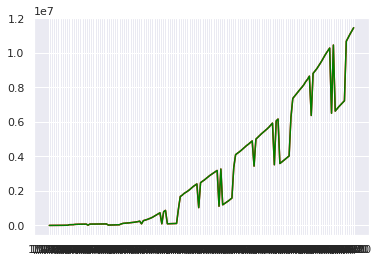

In [77]:
dx = plt.plot(df.groupby("Date").sum()["cases" ] , color = "red" , label = "Normal data" )
dfrollmean_cas = plt.plot(rollmean_cas , color= "green" , label = "Rolling mean")
dfrollstd_cas = plt.plot(rollstd_cas , color = "blue" , label = "Rolling std")

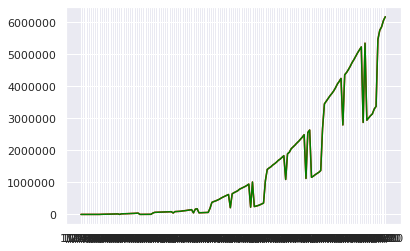

In [78]:
dx = plt.plot(df.groupby("Date").sum()["recovered" ] , color = "red" , label = "Normal data" )
dfrollmean_cas = plt.plot(rollmean_rec , color= "green" , label = "Rolling mean")
dfrollstd_cas = plt.plot(rollstd_rec , color = "blue" , label = "Rolling std")

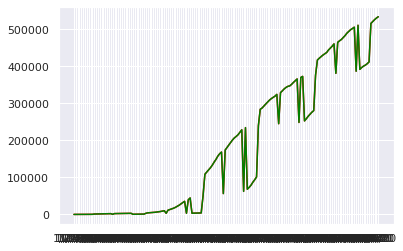

In [79]:
dx = plt.plot(df.groupby("Date").sum()["deaths" ] , color = "red" , label = "Normal data" )
dfrollmean_cas = plt.plot(rollmean_dea , color= "green" , label = "Rolling mean")
dfrollstd_cas = plt.plot(rollstd_dea , color = "blue" , label = "Rolling std")

In [80]:
#checking stationery


In [81]:
#a function to check stationality
def check_stationary(timeseries):
    '''
    defining  the rolling statistics
    '''
    rol_mean =  timeseries.rolling(window=7,center=False).mean()
    rol_std = timeseries.rolling(window=7,center=False).std()
    '''
    plot rolling statistics
    '''
    orig = plt.plot(timeseries, color='blue',label='Original Ts')
    mean = plt.plot(rol_mean, color='red', label='Rolling Mean')
    std = plt.plot(rol_std, color='black', label = 'Rolling Std')
    plt.xlabel('time')
    plt.ylabel('Number of calls')
    plt.legend(loc='best')
    plt.title('Rolling Mean And Standard Deviation')
    plt.show(block=False)

In [82]:
# checking stationary using addfuller

from statsmodels.tsa.stattools import adfuller
def check_stationary_adfuller(data):
    print("Adfuller stationarity check")
    dftest = adfuller(data , autolag = "AIC")
    dfresult = pd.Series(dftest[0:4] , index = ["Test Statistic", "p-value" ,"#Lags Used" , "Number of Observation Used" ])
    for key , value in dftest[4].items():
        print(f"Critical Value {key}   {value}\n")
#     pass
#     dfresult[f"Critical Value {key}"] + value

    print(dfresult)

In [83]:
#4cases
check_stationary_adfuller(df4['cases'])

Adfuller stationarity check
Critical Value 1%   -3.4732590518613002

Critical Value 5%   -2.880374082105334

Critical Value 10%   -2.5768120811654525

Test Statistic                  0.948896
p-value                         0.993696
#Lags Used                     10.000000
Number of Observation Used    155.000000
dtype: float64


In [84]:
#4deaths
check_stationary_adfuller(df4['deaths'])

Adfuller stationarity check
Critical Value 1%   -3.4732590518613002

Critical Value 5%   -2.880374082105334

Critical Value 10%   -2.5768120811654525

Test Statistic                  0.397033
p-value                         0.981384
#Lags Used                     10.000000
Number of Observation Used    155.000000
dtype: float64


In [85]:
#4recovery
check_stationary_adfuller(df4['recovered'])

Adfuller stationarity check
Critical Value 1%   -3.4732590518613002

Critical Value 5%   -2.880374082105334

Critical Value 10%   -2.5768120811654525

Test Statistic                  1.228583
p-value                         0.996178
#Lags Used                     10.000000
Number of Observation Used    155.000000
dtype: float64


In [86]:
#lets draw thsi stationary checking graphs


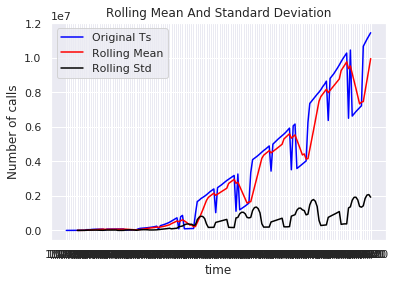

In [87]:
#4cases
check_stationary(df4['cases'])

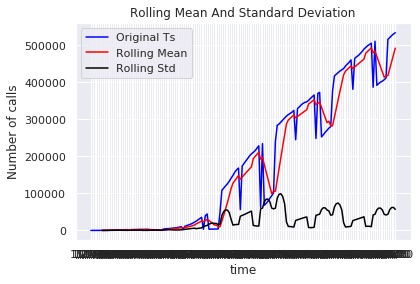

In [88]:
#4deaths
check_stationary(df4['deaths'])

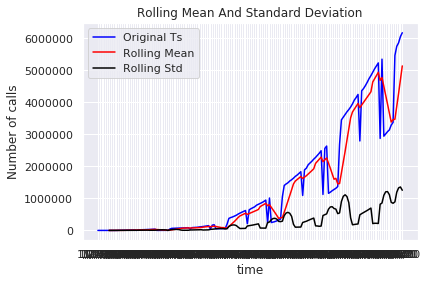

In [89]:
#4recovery
check_stationary(df4['recovered'])

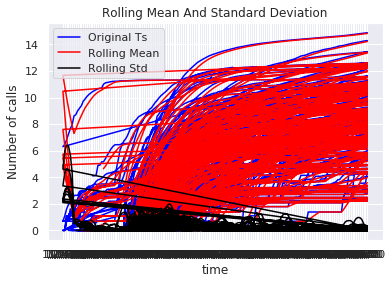

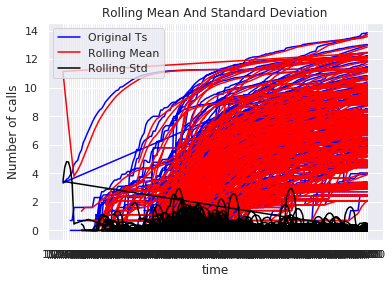

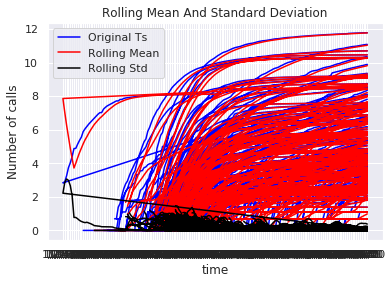

In [90]:
#from the above results the data is not stationary..
# lets look for llogs to see resultys
#take log of the df
ts_log = np.log(df['cases'])
check_stationary(ts_log)
#take log of the df
ts_log_r = np.log(df['recovered'])
check_stationary(ts_log_r)
#take log of the deaths
ts_log_d = np.log(df['deaths'])
check_stationary(ts_log_d)

In [91]:
# using addfuller
# check_stationary_adfuller(ts_log)

In [92]:
# check_stationary_adfuller(ts_log_d)

In [93]:
# check_stationary_adfuller(ts_log_r)

In [94]:
#trying to make it statuionary
#make the ts stationary
ts_log_diff = ts_log - ts_log.shift()
# plt.plot(ts_log_diff)

# ts_log_diff_r = ts_log_r - ts_log_r.shift()
# plt.plot(ts_log_diff_r)

# ts_log_diff_d = ts_log_d - ts_log_d.shift()
# plt.plot(ts_log_diff_d)

In [95]:
# #using statsmodel to see seasonality
# from statsmodels.tsa.seasonal import seasonal_decompose
# decompose = seasonal_decompose(ts_log_diff)
# trend = decompose.trend
# resid = decompose.resid
# season = decompose.seasonal

# #draw graphs
# plt.subplot(411)
# plt.plot(ts_log_diff , label = "Original")
# plt.legend(loc = "best")

# plt.subplot(412)
# plt.plot(trend , label = "trending")
# plt.legend(loc = "best")

# plt.subplot(413)
# plt.plot(season , label = "Seasonal")
# plt.legend(loc = "best")

# plt.subplot(414)
# plt.plot(resid , label = "Residual")
# plt.legend(loc = "best")

# plt.tight_layout()

##  Modeling will be finished Later..

## Done by....
 - Stephen Kamau.
 - email .. stiveckamash@gmail.com  / stephenkamau714@gmail.com 

In [96]:
oddN= []
# lets say odd given is 7
# this line oddN = [i for i in range(1 , (y*2)+1) if i % 2 != 0]
# is same as loop below
odd = 7
for i in range(1 , (odd*2)+1):
    if i%2 != 0:
        oddN.append(i)
        
oddN

[1, 3, 5, 7, 9, 11, 13]

In [97]:
# It is this way...

# for oddN...loops through the odd values passed from one to odd*2
# and filters only the odd number..

In [98]:
from itertools import combinations as C
x = [1,3,5,7]
e = [2,4,6,8]
l = 2
list(C(x,l))
[j for m in list(C(x,l)) for j in m]

[1, 3, 1, 5, 1, 7, 3, 5, 3, 7, 5, 7]